In [1]:
# basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string

# machine learning library
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# nlp library
import nltk

# other library
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm

In [2]:
df = pd.read_csv('tweets.csv', encoding='latin')


In [3]:
df.head()

,Target,ID,Date,flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.isnull().sum()

Target    0
ID        0
Date      0
flag      0
User      0
Text      0
dtype: int64

In [5]:
df.shape

(7551, 6)

In [6]:
df.columns

Index(['Target', 'ID', 'Date', 'flag', 'User', 'Text'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  7551 non-null   int64 
 1   ID      7551 non-null   int64 
 2   Date    7551 non-null   object
 3   flag    7551 non-null   object
 4   User    7551 non-null   object
 5   Text    7551 non-null   object
dtypes: int64(2), object(4)
memory usage: 354.1+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,7551.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ID,7551.0,1.468724e+09,559516.388024,1.467811e+09,1.468257e+09,1.468674e+09,1.469151e+09,1.469868e+09


In [9]:
df = df[['Text']]

In [10]:
df

,Text
0,is upset that he can't update his Facebook by ...
1,@Kenichan I dived many times for the ball. Man...
2,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all...."
4,@Kwesidei not the whole crew
...,...
7546,another long day today is it friday yet??!
7547,that hurt my feelings *B-Unit*
7548,@kyndoll yo yo happy birthday! wish it was my ...
7549,Having my AT&amp;T DSL going down so frequentl...


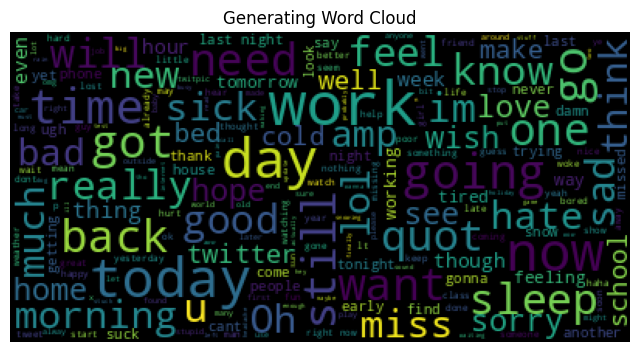

In [11]:
wc = WordCloud(background_color="black", max_words=1000,
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(df['Text']))

plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.title('Generating Word Cloud')
plt.axis('off')
plt.show()

In [12]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [13]:
text = df['Text'].apply(lambda x: clean_text(x))

# make dictionary
text_ = {'clean_text': text}

# make dataframe
df_clean_text = pd.DataFrame.from_dict(text_)
df_clean_text

,clean_text
0,is upset that he cant update his facebook by t...
1,kenichan i dived many times for the ball manag...
2,my whole body feels itchy and like its on fire
3,nationwideclass no its not behaving at all im ...
4,kwesidei not the whole crew
...,...
7546,another long day today is it friday yet
7547,that hurt my feelings bunit
7548,kyndoll yo yo happy birthday wish it was my bi...
7549,having my atampt dsl going down so frequently ...


In [15]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
def remove_stopwords(text):

    # tokenization words
    words = nltk.word_tokenize(text)

    # remove meaningless words
    stop_words = nltk.corpus.stopwords.words('english')
    add_stop_words = ['u', 'im', 'um', 'aaaaand', 'aaronrva', 'aaw', 'ï¿½n', 'ï¿½tieï¿½', 'abl', 'abt']
    stop_words = stop_words + add_stop_words
    # remove stopwords from sentence
    filtered_words = [word for word in words if word not in stop_words]

    # stemming word to base vocab
    stemmer = nltk.SnowballStemmer("english")
    filtered_words = [stemmer.stem(word) for word in filtered_words]

    return filtered_words

df['vectors'] = df_clean_text['clean_text'].apply(remove_stopwords)
df

,Text,vectors
0,is upset that he can't update his Facebook by ...,"[upset, cant, updat, facebook, text, might, cr..."
1,@Kenichan I dived many times for the ball. Man...,"[kenichan, dive, mani, time, ball, manag, save..."
2,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
3,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behav, mad, cant, see]"
4,@Kwesidei not the whole crew,"[kwesidei, whole, crew]"
...,...,...
7546,another long day today is it friday yet??!,"[anoth, long, day, today, friday, yet]"
7547,that hurt my feelings *B-Unit*,"[hurt, feel, bunit]"
7548,@kyndoll yo yo happy birthday! wish it was my ...,"[kyndol, yo, yo, happi, birthday, wish, birthd..."
7549,Having my AT&amp;T DSL going down so frequentl...,"[atampt, dsl, go, frequent, get, annoy]"


In [19]:
def custom_token(text):
    # specific format to feed into count vectorizer and tf-idf
    result = text.split(' ')
    return result

In [20]:
# see example of format that we need to feed into count vectorization and tf-idf
corpus = [' '.join(words) for words in df['vectors']]
corpus[:2]

['upset cant updat facebook text might cri result school today also blah',
 'kenichan dive mani time ball manag save rest go bound']

In [21]:
# see example of format that we need to feed into count vectorization and tf-idf
for i in corpus[:2]:
    print(custom_token(i))

['upset', 'cant', 'updat', 'facebook', 'text', 'might', 'cri', 'result', 'school', 'today', 'also', 'blah']
['kenichan', 'dive', 'mani', 'time', 'ball', 'manag', 'save', 'rest', 'go', 'bound']


In [22]:
# Initialize the CountVectorizer with custom token
count_vectorizer = CountVectorizer(tokenizer=custom_token)

# Fit the vectorizer and transform the text into a term-document matrix
count_vect = count_vectorizer.fit_transform(corpus)

print(count_vectorizer.get_feature_names_out())
print(count_vect.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['' 'aa' 'aaa' ... 'ï¿½tobe' 'ï¿½ï¿½' 'ï¿½ï¿½also']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [23]:
count_vect.toarray().shape
# 1000 row and 2,776 words token

(7551, 11302)

In [24]:
df_count_vect = pd.DataFrame(count_vect.toarray(),
                             columns=count_vectorizer.get_feature_names_out(),
                             )
display(df)
display(df_count_vect)

,Text,vectors
0,is upset that he can't update his Facebook by ...,"[upset, cant, updat, facebook, text, might, cr..."
1,@Kenichan I dived many times for the ball. Man...,"[kenichan, dive, mani, time, ball, manag, save..."
2,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
3,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behav, mad, cant, see]"
4,@Kwesidei not the whole crew,"[kwesidei, whole, crew]"
...,...,...
7546,another long day today is it friday yet??!,"[anoth, long, day, today, friday, yet]"
7547,that hurt my feelings *B-Unit*,"[hurt, feel, bunit]"
7548,@kyndoll yo yo happy birthday! wish it was my ...,"[kyndol, yo, yo, happi, birthday, wish, birthd..."
7549,Having my AT&amp;T DSL going down so frequentl...,"[atampt, dsl, go, frequent, get, annoy]"


,,aa,aaa,aaaaaaaa,aaaaaaaaaah,aaaaaaaaah,aaaaah,aaaaargh,aaaah,aaaargh,...,ï,ï¿,ï¿½,ï¿½awwwwwwwwwww,ï¿½ber,ï¿½i,ï¿½k,ï¿½tobe,ï¿½ï¿½,ï¿½ï¿½also
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Initialize the TfidfVectorizer with the tokenizer and stemmer
tf_vectorizer = TfidfVectorizer(tokenizer=custom_token)

# Fit the vectorizer and transform the text into a TF-IDF matrix
tf_vect = tf_vectorizer.fit_transform(corpus)

print(tf_vectorizer.get_feature_names_out())
print(tf_vect.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['' 'aa' 'aaa' ... 'ï¿½tobe' 'ï¿½ï¿½' 'ï¿½ï¿½also']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [26]:
tf_vect.toarray().shape
# 1000 row and 2,776 words token

(7551, 11302)

In [27]:
df_tf_vect = pd.DataFrame(tf_vect.toarray(),
                          columns=tf_vectorizer.get_feature_names_out(),
                          )
display(df)
display(df_tf_vect)

,Text,vectors
0,is upset that he can't update his Facebook by ...,"[upset, cant, updat, facebook, text, might, cr..."
1,@Kenichan I dived many times for the ball. Man...,"[kenichan, dive, mani, time, ball, manag, save..."
2,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
3,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behav, mad, cant, see]"
4,@Kwesidei not the whole crew,"[kwesidei, whole, crew]"
...,...,...
7546,another long day today is it friday yet??!,"[anoth, long, day, today, friday, yet]"
7547,that hurt my feelings *B-Unit*,"[hurt, feel, bunit]"
7548,@kyndoll yo yo happy birthday! wish it was my ...,"[kyndol, yo, yo, happi, birthday, wish, birthd..."
7549,Having my AT&amp;T DSL going down so frequentl...,"[atampt, dsl, go, frequent, get, annoy]"


,,aa,aaa,aaaaaaaa,aaaaaaaaaah,aaaaaaaaah,aaaaah,aaaaargh,aaaah,aaaargh,...,ï,ï¿,ï¿½,ï¿½awwwwwwwwwww,ï¿½ber,ï¿½i,ï¿½k,ï¿½tobe,ï¿½ï¿½,ï¿½ï¿½also
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# store both vectorizers in matrix as np array
count_vect = df_count_vect.to_numpy()
tf_vect = df_tf_vect.to_numpy()

In [29]:
df_count_cosine = pd.DataFrame(cosine_similarity(count_vect, count_vect))
df_count_cosine

,0,1,2,3,4,5,6,7,8,9,...,7541,7542,7543,7544,7545,7546,7547,7548,7549,7550
0,1.000000,0.000000,0.000000,0.129099,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.117851,0.000000,0.0,0.000000,0.0
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.081650,0.0,0.0,0.0,...,0.000000,0.119523,0.000000,0.091287,0.0,0.000000,0.000000,0.0,0.129099,0.0
2,0.000000,0.000000,1.000000,0.000000,0.235702,0.0,0.000000,0.0,0.0,0.0,...,0.235702,0.000000,0.144338,0.000000,0.0,0.000000,0.235702,0.0,0.000000,0.0
3,0.129099,0.000000,0.000000,1.000000,0.000000,0.0,0.115470,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0.000000,0.000000,0.235702,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546,0.117851,0.000000,0.000000,0.000000,0.000000,0.0,0.105409,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0
7547,0.000000,0.000000,0.235702,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.204124,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
7548,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0
7549,0.000000,0.129099,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0


In [30]:
df_tf_cosine = pd.DataFrame(cosine_similarity(tf_vect, tf_vect))
df_tf_cosine

,0,1,2,3,4,5,6,7,8,9,...,7541,7542,7543,7544,7545,7546,7547,7548,7549,7550
0,1.000000,0.000000,0.000000,0.044954,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.057762,0.000000,0.0,0.000000,0.0
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.032454,0.0,0.0,0.0,...,0.000000,0.060898,0.000000,0.035159,0.0,0.000000,0.000000,0.0,0.029036,0.0
2,0.000000,0.000000,1.000000,0.000000,0.220268,0.0,0.000000,0.0,0.0,0.0,...,0.088301,0.000000,0.071109,0.000000,0.0,0.000000,0.091067,0.0,0.000000,0.0
3,0.044954,0.000000,0.000000,1.000000,0.000000,0.0,0.060950,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0.000000,0.000000,0.220268,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546,0.057762,0.000000,0.000000,0.000000,0.000000,0.0,0.094044,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0
7547,0.000000,0.000000,0.091067,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.099080,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
7548,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0
7549,0.000000,0.029036,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0


In [31]:
print(df['Text'].iloc[2])
print(df['vectors'].iloc[2])

my whole body feels itchy and like its on fire 
['whole', 'bodi', 'feel', 'itchi', 'like', 'fire']


In [32]:
print(df['Text'].iloc[4])
print(df['vectors'].iloc[4])

@Kwesidei not the whole crew 
['kwesidei', 'whole', 'crew']


In [33]:
# identifiy similarity between observations of count vectorizer
corr = 0.90
df_count_cosine_corr = df_count_cosine[df_count_cosine>=corr]
na_count = len(df_count_cosine_corr.columns) - 1

for index in df_count_cosine_corr.index:
    if df_count_cosine_corr[index].isna().sum() == na_count:
        df_count_cosine_corr.drop(columns=index, inplace=True)
        df_count_cosine_corr.drop(index, inplace=True)
        na_count -= 1
df_count_cosine_corr.fillna(0, inplace=True)
df_count_cosine_corr

,5,53,127,207,213,237,245,248,252,356,...,7020,7120,7252,7270,7274,7343,7363,7389,7450,7550
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
7363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
print(df['Text'].iloc[5])
print(df['vectors'].iloc[5])

Need a hug 
['need', 'hug']


In [35]:
print(df['Text'].iloc[53])
print(df['vectors'].iloc[53])

I need a hug 
['need', 'hug']


In [36]:
# identifiy similarity between observations of tf-idf vectorizer
corr = 0.90
df_tf_cosine_corr = df_tf_cosine[df_tf_cosine>=corr]
na_count = len(df_tf_cosine_corr.columns) - 1

for index in df_tf_cosine_corr.index:
    if df_tf_cosine_corr[index].isna().sum() == na_count:
        df_tf_cosine_corr.drop(columns=index, inplace=True)
        df_tf_cosine_corr.drop(index, inplace=True)
        na_count -= 1
df_tf_cosine_corr.fillna(0, inplace=True)
df_tf_cosine_corr

,5,53,127,207,213,237,245,248,252,356,...,7120,7252,7270,7274,7343,7363,7381,7389,7450,7550
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
213,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
print(df['Text'].iloc[887])
print(df['vectors'].iloc[887])

so far i have 311 on all my sites put together,  most of them were me checking out the updates i made......
['far', 'site', 'put', 'togeth', 'check', 'updat', 'made']


In [38]:
print(df['Text'].iloc[899])
print(df['vectors'].iloc[899])

so far i have 311 veiws on all my sites put together,  most of them were me checking out the updates i made......
['far', 'veiw', 'site', 'put', 'togeth', 'check', 'updat', 'made']


# The main difference between Count Vectorizer and TF-IDF Vectorizer lies in the weighing of the words.

## Count Vectorizer
assigns equal importance to all words.
suitable for tasks where the frequency of occurrence of a word is important, such as sentiment analysis, spam detection, etc.

## TF-IDF Vectorizer
assigns higher weights to words that are more important (have higher TF-IDF values), which means it gives less importance to common words.
suitable for tasks where the importance of words relative to the entire corpus is important, such as document classification, information retrieval, etc.